# Hands-on Exercise for CLUS Module


### 0. Setting up necessary packages and creating data 

In [1]:
!pip install --user scikit-learn --upgrade

Traceback (most recent call last):
  File "/usr/local/anaconda5/bin/pip", line 7, in <module>
    from pip import main
ImportError: cannot import name 'main'


Import necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn import datasets

# importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

from sklearn.metrics import silhouette_samples



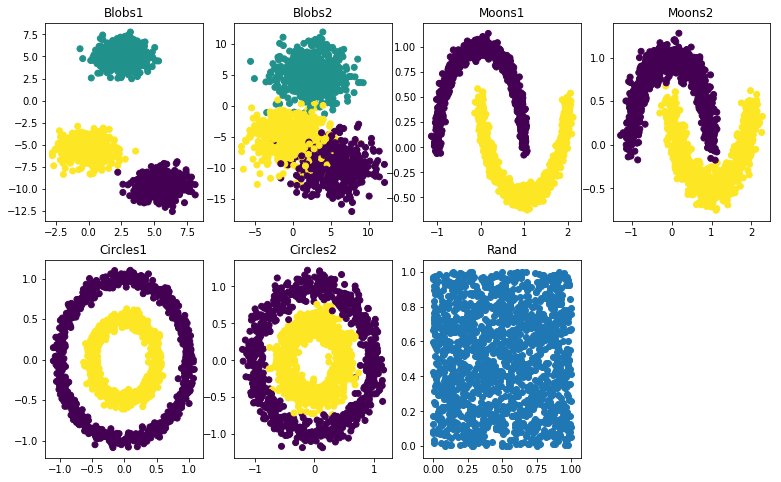

In [2]:
n_samples = 1500
random_state = 10

Blobs1_X, Blobs1_y = datasets.make_blobs(n_samples=n_samples,
                             random_state=random_state)
Blobs2_X, Blobs2_y = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[2.5, 2.5, 2.5],
                             random_state=random_state)
Moons1_X, Moons1_y = datasets.make_moons(n_samples=n_samples, noise=0.05,
                             random_state=random_state)
Moons2_X, Moons2_y = datasets.make_moons(n_samples=n_samples, noise=0.1,
                             random_state=random_state)
Circles1_X, Circles1_y = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05, random_state=random_state)
Circles2_X, Circles2_y = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=0.1, random_state=random_state)
Rand_X = np.random.rand(n_samples, 2);
plt.figure(figsize=(13,8))

plt.subplot(2,4,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c= Blobs1_y)
plt.title('Blobs1')

plt.subplot(2,4,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c= Blobs2_y)
plt.title('Blobs2')

plt.subplot(2,4,3)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c= Moons1_y)
plt.title('Moons1')

plt.subplot(2,4,4)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c= Moons2_y)
plt.title('Moons2')

plt.subplot(2,4,5)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c= Circles1_y)
plt.title('Circles1')

plt.subplot(2,4,6)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c= Circles2_y)
plt.title('Circles2')

plt.subplot(2,4,7)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1])
plt.title('Rand')
plt.show()

Code for RandIndex function

In [3]:
from scipy.special import comb
def rand_index(S, T):

    Spairs = comb(np.bincount(S), 2).sum()
    Tpairs = comb(np.bincount(T), 2).sum()
    
    A = np.c_[(S, T)]
    
    f_11 = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(S))
    
    f_10 = Spairs - f_11
    f_01 = Tpairs - f_11
    f_00 = comb(len(A), 2) - f_11 - f_10 - f_01
    return (f_00 + f_11) / (f_00 + f_01 + f_10 + f_11)

Code for Hopkins statistic

In [4]:
from sklearn.neighbors import NearestNeighbors 
from random import sample 
from numpy.random import uniform 
from math import isnan
def hopkins(X):
    n=X.shape[0]#rows
    d=X.shape[1]#cols
    p=int(0.1*n)#considering 10% of points
    nbrs=NearestNeighbors(n_neighbors=1).fit(X)
    
    rand_X=sample(range(0,n),p)
    uj=[]
    wj=[]
    for j in range(0,p):
        u_dist,_=nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1,-1),2,return_distance=True)
        uj.append(u_dist[0][1])#distances to nearest neighbors in random data
        w_dist,_=nbrs.kneighbors(X[rand_X[j]].reshape(1,-1),2,return_distance=True)
        wj.append(w_dist[0][1])#distances to nearest neighbors in real data
    H=sum(uj)/(sum(uj)+sum(wj))
    if isnan(H):
        print(uj,wj)
        H=0
        
    return H

Code for Silhouette coefficient

In [5]:
def silhouette(X,labels):
    n_clusters=np.size(np.unique(labels));
    sample_silhouette_values=silhouette_samples(X,labels)
    y_lower=10
    for i in range(n_clusters):
        ith_cluster_silhouette_values=sample_silhouette_values[labels==i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i=ith_cluster_silhouette_values.shape[0]
        y_upper=y_lower+size_cluster_i
        color=cm.nipy_spectral(float(i)/n_clusters)
        plt.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)# Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05,y_lower+0.5*size_cluster_i,str(i))#Compute the new y_lower for next cluster
        y_lower=y_upper+10# 10 for the 0 samples
    plt.title("Silhouette plot for the various clusters.")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.show()

### 1. K-Means clustering

<span style="color:red">**Question 1a:** </span> Without running K-Means clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where k-Means is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer: K means (K =3) would do very well on the blobs_1 dataset since the data there is both globular and also the clusters are very well separated. K -means would also do well on the blobs_2 dataset since the clusters are still globular but not as well as it did on blobs_1 since the clusters overlap a bit.** </span>

<span style="color:red">**Question 1b:** </span> Without running K-Means clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where k-Means is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:
 <ul>
     <li>Moons 1 : Since the clusters are not globular, and K -means is  based on a centroid method it is likely that it'd find 2 dense clusters (out of K) one at the top and one below, which is not the ideal way to cluster the data  </li>
     <li>Moons 2 : Since the clusters are not globular, and K -means is  based on a centroid method it is likely that it'd find 2 dense cluster  (out of K) one at the top and one below, which is not the ideal way to cluster the data
     </li>
     <li>
         Circle 1: Although the clusters are globular but since 1 big cluster contains another cluster it's likley K-means would perform very badly because since it'd find k clusters based on the least SSE, which doesn't fit well with the required cluster.
     </li>
     <li>
      Circle 2: Although the clusters are globular but since 1 big cluster contains another cluster it's likley K-means would perform very badly because since it'd find k clusters (including 1 big cluster) based on the least SSE, which doesn't fit well with the required cluster.
     </li>
         
 </ul>
 Generally, the objective of K means is to reduce the sum of squared errors from k means, hence it wouldn't care if the cluster is a density based cluster or a agglomerative cluster
    ** </span>



<span style="color:red">**Question 1c:** </span> Run K-Means algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of K-means performance. Describe your rationale for your ranking.

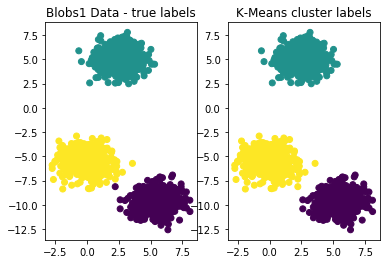

In [31]:
kmeans = KMeans(n_clusters=3, random_state=random_state);
Blobs1_y_Kmeans = kmeans.fit_predict(Blobs1_X)
fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y) # true clusters
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y_Kmeans)  # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()

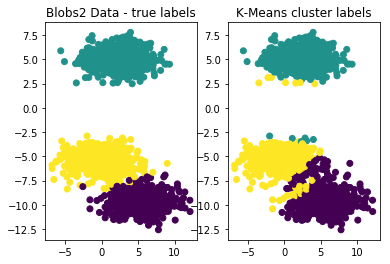

In [34]:
Blobs2_y_Kmeans = kmeans.fit_predict(Blobs2_X)
fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Blobs2_X[:, 0], Blobs1_X[:, 1], c=Blobs2_y) # true clusters
plt.title('Blobs2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs2_X[:, 0], Blobs1_X[:, 1], c=Blobs2_y_Kmeans)  # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()

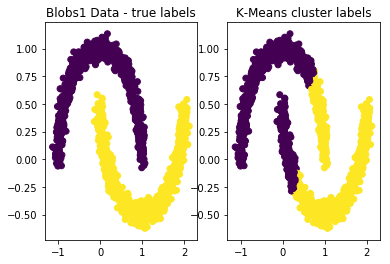

In [18]:
kmeans = KMeans(n_clusters=2, random_state=random_state);
Moons1_y_Kmeans = kmeans.fit_predict(Moons1_X)
fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=Moons1_y) # true clusters
plt.title('Moons1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=Moons1_y_Kmeans)  # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()

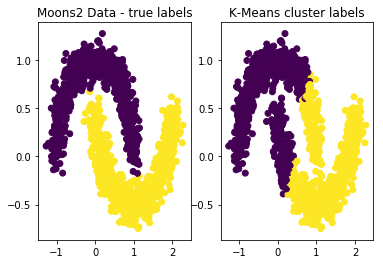

In [20]:
Moons2_y_Kmeans = kmeans.fit_predict(Moons2_X)
fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=Moons2_y) # true clusters
plt.title('Moons2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=Moons1_y_Kmeans)  # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()

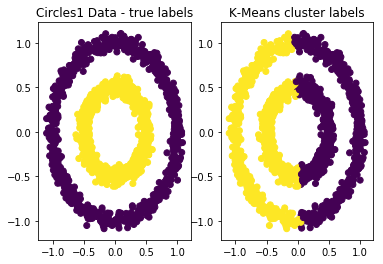

In [23]:
kmeans = KMeans(n_clusters=2, random_state=random_state);
Circles1_y_Kmeans = kmeans.fit_predict(Circles1_X)
fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=Circles1_y) # true clusters
plt.title('Circles1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=Circles1_y_Kmeans)  # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()

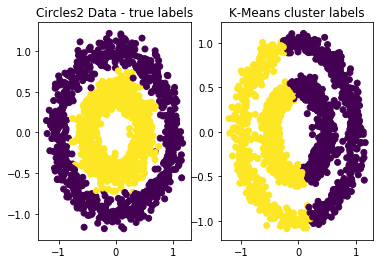

In [24]:
Circles2_y_Kmeans = kmeans.fit_predict(Circles2_X)
fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=Circles2_y) # true clusters
plt.title('Circles2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles2_X[:, 0], Circles1_X[:, 1], c=Circles2_y_Kmeans)  # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()

<span style="color:green">**Answer: 
 Rank
    <ol>
    <li>Blobs 1: Almost all of the points are grouped correctly  </li>
    <li>Blobs 2: Some of the points are grouped incorrectly. This may be due to the fact that K-means in the process of minimizing the SSE it wrongly groups few points 
     <li>Moons 1 and 2 have about little more than 50% of the points assigned correctly to each of it's respective cluster from K -means. This is due to the shape of the original cluster,  for the moons K-means doeesn't respect for the density and instead tries to cluster based on distances(SSE) from the centroid </li>
      <li>
         circles 1 and 2 have about 50% of the points assigned correctly to each of it's respective cluster from K -means. Again this due to the shape of the original cluster, which although circular in circles but is linearly unseparable thus making k-means wrongly group the cluster on the basis of minimum sse
       </li>
 </ol>
 
    ** </span>



<span style="color:red">**Question 1d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using K-means. Rank the datasets in decreasing order of Rand-Index scores.

In [36]:
print(rand_index(Blobs1_y, Blobs1_y_Kmeans))
print(rand_index(Blobs2_y, Blobs2_y_Kmeans))
print(rand_index(Moons1_y, Moons1_y_Kmeans))
print(rand_index(Moons2_y, Moons2_y_Kmeans))
print(rand_index(Circles1_y, Circles1_y_Kmeans))
print(rand_index(Circles2_y, Circles2_y_Kmeans))

0.99911140760507
0.9207142539470758
0.6201236379808761
0.6240836112964199
0.4996744496330887
0.4996806760062264


<span style="color:green">**Answer: 
 Rank
    <ol>
    <li>Blobs 1</li>
    <li>Blobs 2</li> 
     <li>Moons 2</li> 
     <li>Moons 1</li> 
     <li>Circles 2</li> 
     <li>Circles 1</li>
 </ol>**
 
   </span>


<span style="color:red">**Question 1e:** </span> Are the rankings in (c) consistent with your observations in (d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer: Yes the rank were consistent with my observation** </span>



### 2. Agglomerative Clustering - Single Link

<span style="color:red">**Question 2a:** </span> Without running Single-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Single-link agglomerative clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer: Single-link agglomerative clustering would do well on Circles 1, Blobs_1 and Moons_1  as the points there follow a heirarchical pattern** </span>



<span style="color:red">**Question 2b:** </span> Without running Single-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Single-link agglomerative clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer: It wouldn't do that well on Blobs_2, Moons_2 or Circles_2 dataset, since it uses the distance between two nearest point of two respective clusters, so it's likely that it'd merge points from different clusters since all the clusters in this dataset are really close to each other** </span>



<span style="color:red">**Question 2c:** </span> Run Single-link agglomerative clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Single-link agglomerative algorithm performance. Describe your rationale for your ranking.

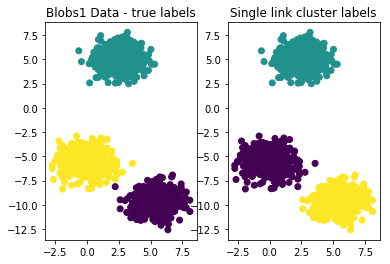

In [416]:
n_clusters = 3
single_linkage = AgglomerativeClustering(linkage="single", n_clusters=n_clusters)
Blobs1_y_agg_single = single_linkage.fit_predict(Blobs1_X)
plt.subplot(1,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y)
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y_agg_single)
plt.title('Single link cluster labels')
plt.show()

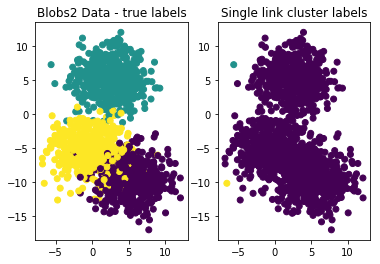

In [417]:
single_linkage = AgglomerativeClustering(linkage="single", n_clusters=n_clusters)
Blobs2_y_agg_single = single_linkage.fit_predict(Blobs2_X)
plt.subplot(1,2,1)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=Blobs2_y)
plt.title('Blobs2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=Blobs2_y_agg_single)
plt.title('Single link cluster labels')
plt.show()

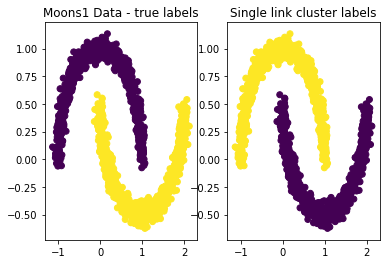

In [418]:
n_clusters = 2
single_linkage = AgglomerativeClustering(linkage="single", n_clusters=n_clusters)
Moons1_y_agg_single = single_linkage.fit_predict(Moons1_X)
plt.subplot(1,2,1)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=Moons1_y)
plt.title('Moons1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=Moons1_y_agg_single)
plt.title('Single link cluster labels')
plt.show()

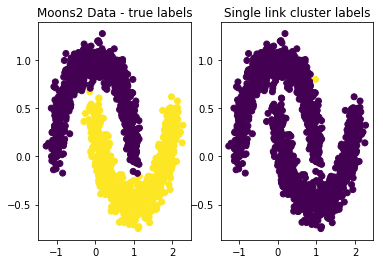

In [419]:
single_linkage = AgglomerativeClustering(linkage="single", n_clusters=n_clusters)
Moons2_y_agg_single = single_linkage.fit_predict(Moons2_X)
plt.subplot(1,2,1)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=Moons2_y)
plt.title('Moons2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=Moons2_y_agg_single)
plt.title('Single link cluster labels')
plt.show()

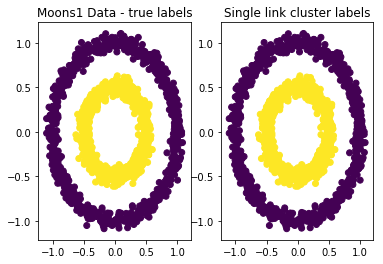

In [420]:
single_linkage = AgglomerativeClustering(linkage="single", n_clusters=n_clusters)
Circles1_y_agg_single = single_linkage.fit_predict(Circles1_X)
plt.subplot(1,2,1)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=Circles1_y)
plt.title('Moons1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=Circles1_y_agg_single)
plt.title('Single link cluster labels')
plt.show()

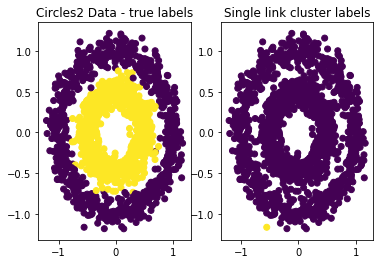

In [421]:
single_linkage = AgglomerativeClustering(linkage="single", n_clusters=n_clusters)
Circles2_y_agg_single = single_linkage.fit_predict(Circles2_X)
plt.subplot(1,2,1)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=Circles2_y)
plt.title('Circles2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=Circles2_y_agg_single)
plt.title('Single link cluster labels')
plt.show()

<span style="color:green">**Answer: 
 Rank
    <ol>
     <li>Circles 1, Moons 1 - Clustered as expected</li>
    <li>Blobs 1 - Few points which lie slightly outside the cluster are wrongly assigned</li>
     <li>Blobs 2 - Since it uses the nearest link to merge the clusters, it wrongly merged 2 different clusters </li>
     <li>Circles 2 and Moons 2 - Again as mentioned above it merges 2 different clusters into one, thereby wrongly clustering atleast 50% of points </li>
 </ol>**
 
   </span>

<span style="color:red">**Question 2d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Single-link agglomerative clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

In [55]:
print(rand_index(Blobs1_y, Blobs1_y_agg_single))
print(rand_index(Blobs2_y, Blobs2_y_agg_single))
print(rand_index(Moons1_y, Moons1_y_agg_single))
print(rand_index(Moons2_y, Moons2_y_agg_single))
print(rand_index(Circles1_y, Circles1_y_agg_single))
print(rand_index(Circles2_y, Circles2_y_agg_single))

0.99911140760507
0.33377896375361354
1.0
0.49966733377807426
1.0
0.49966733377807426


<span style="color:green">**Answer: 
 Rank
    <ol> 
     <li>Moons 1, Circles 1</li> 
    <li>Blobs 1</li> 
     <li>Blobs 2</li>
     <li>Moons 2 and Circles 2</li>
 </ol>**
 
   </span>


<span style="color:red">**Question 2e:** </span> Are the rankings in 2(c) consistent with your observations in 2(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer: Yes they're consistent** </span>



### 3. Agglomerative Clustering - Max Link

<span style="color:red">**Question 3a:** </span> Without running Max-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Max-link agglomerative clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer: Since it uses the max distance it is likely it'd work well on Blobs 1 dataset as the cluster there's well separated** </span>



<span style="color:red">**Question 3b:** </span> Without running Max-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Max-link agglomerative clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer: It will not work well with the Blobs_2 as the points overlap a bit and it's likely to wrongly assign those cluster, Moons_1 and Moon_2 as the two edges of the 2 different clusters are closer in distance it'd merge one edge into one  cluster as the distance between two edges of within cluster is very big compared to distance between the edges of two inter-clusters. Similarly for circles 1 and 2 it's like divide it in to two halves as the original within cluster distance is very big compared to the original intra-cluster distance** </span>



<span style="color:red">**Question 3c:** </span> Run Max-link agglomerative clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Max-link agglomerative algorithm performance. Describe your rationale for your ranking.

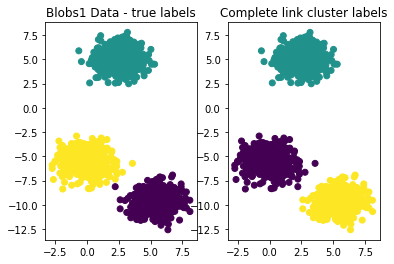

In [66]:
n_clusters = 3
complete_linkage = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters)
Blobs1_y_agg_complete = complete_linkage.fit_predict(Blobs1_X)
plt.subplot(1,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y)
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y_agg_complete)
plt.title('Complete link cluster labels')
plt.show()

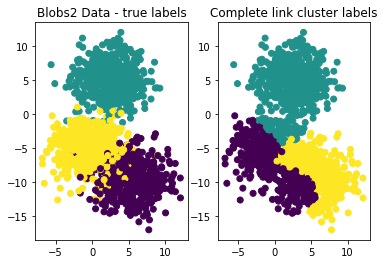

In [67]:
complete_linkage = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters)
Blobs2_y_agg_complete = complete_linkage.fit_predict(Blobs2_X)
plt.subplot(1,2,1)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=Blobs2_y)
plt.title('Blobs2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=Blobs2_y_agg_complete)
plt.title('Complete link cluster labels')
plt.show()

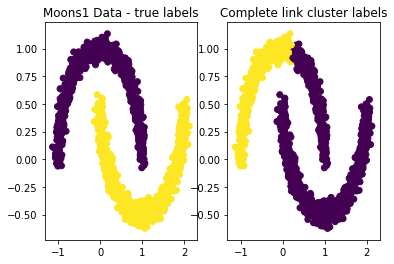

In [68]:
n_clusters = 2
complete_linkage = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters)
Moons1_y_agg_complete = complete_linkage.fit_predict(Moons1_X)
plt.subplot(1,2,1)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=Moons1_y)
plt.title('Moons1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=Moons1_y_agg_complete)
plt.title('Complete link cluster labels')
plt.show()

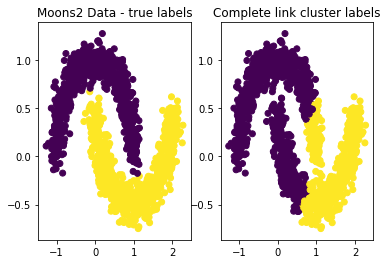

In [69]:
complete_linkage = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters)
Moons2_y_agg_complete = complete_linkage.fit_predict(Moons2_X)
plt.subplot(1,2,1)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=Moons2_y)
plt.title('Moons2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=Moons2_y_agg_complete)
plt.title('Complete link cluster labels')
plt.show()

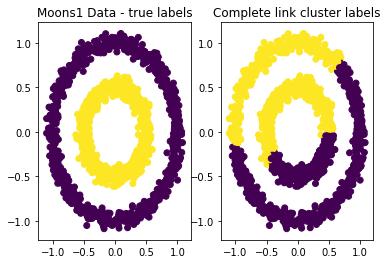

In [70]:
complete_linkage = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters)
Circles1_y_agg_complete = complete_linkage.fit_predict(Circles1_X)
plt.subplot(1,2,1)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=Circles1_y)
plt.title('Moons1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=Circles1_y_agg_complete)
plt.title('Complete link cluster labels')
plt.show()

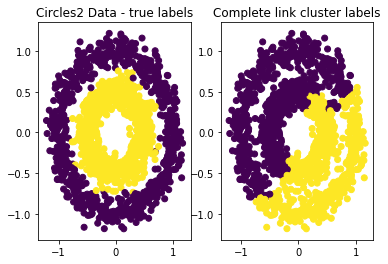

In [71]:
complete_linkage = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters)
Circles2_y_agg_complete = complete_linkage.fit_predict(Circles2_X)
plt.subplot(1,2,1)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=Circles2_y)
plt.title('Circles2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=Circles2_y_agg_complete)
plt.title('Complete link cluster labels')
plt.show()

<span style="color:green">**Answer: 
 Rank
    <ol>
    <li>Blobs 1 - One or 2 points which lie slightly outside the cluster are wrongly assigned</li>
    <li>Blobs 2 - all 3 clusters are well defined except that it wrongly merges some of the points </li>
     <li>Moons1 - Nearly 3/4th of the points are clustered correctly, again it wrongly clusters the 2nd cluster because one edge is too far from the other edge thus causing it to cluster with wrong cluster</li>
     <li>Circles 1, Circles 2 and Moons 2 - Again as mentioned above it merges 2 different clusters into one because within original cluster distance becomes too big at one point, thereby wrongly clustering atleast 50% of the points </li>
 </ol>**
 
   </span>

<span style="color:red">**Question 3d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Max-link agglomerative clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

In [422]:
print(rand_index(Blobs1_y, Blobs1_y_agg_complete))
print(rand_index(Blobs2_y, Blobs2_y_agg_complete))
print(rand_index(Moons1_y, Moons1_y_agg_complete))
print(rand_index(Moons2_y, Moons2_y_agg_complete))
print(rand_index(Circles1_y, Circles1_y_agg_complete))
print(rand_index(Circles2_y, Circles2_y_agg_complete))

0.99911140760507
0.7736544362908606
0.662605292417167
0.5965310206804536
0.5218714698688014
0.5000587058038692


<span style="color:green">**Answer: 
 Rank
    <ol> 
    <li>Blobs 1</li>
     <li>Blobs 2</li>
     <li>Moons 1</li> 
     <li>Moons 2</li>
     <li>Circles 1</li>
     <li>Circles 2</li>
 </ol>**
 
   </span>


<span style="color:red">**Question 3e:** </span> Are the rankings in 3(c) consistent with your observations in 3(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer: Yes they're consistent but there're some slight deviations in numbers** </span>



### 4. Agglomerative Clustering - Average Link

<span style="color:red">**Question 4a:** </span> Without running Average-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Average-link agglomerative clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer: This is going to be average of the above two methods, hence is more likely to perform somewhere between the above two method. It'd work well on Blobs1 data, again due to the fact that data is well separated and hence it's likely the cluster means will be well separated** </span>



<span style="color:red">**Question 4b:** </span> Without running Average-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Average-link agglomerative clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer: It will not work well with the Blobs_2 as the points overlap a bit and it's likely to wrongly assign some of the points, Moons_1 and Moon_2 as the two edges of two different cluster are closer in distance it'd merge as one cluster as the distance between two edges of within cluster is very big When compared to distance between the intra cluster edges. Similarly for circles 1 and 2 it's like divide it in to two halves as the original within cluster distance is very big compared to the original intra-cluster distance** </span>


<span style="color:red">**Question 4c:** </span> Run Average-link agglomerative clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Average-link agglomerative algorithm performance. Describe your rationale for your ranking.

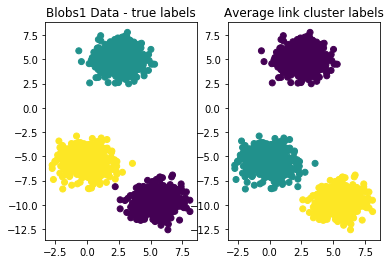

In [81]:
n_clusters = 3
average_linkage = AgglomerativeClustering(linkage="average", n_clusters=n_clusters)
Blobs1_y_agg_average = average_linkage.fit_predict(Blobs1_X)
plt.subplot(1,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y)
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y_agg_average)
plt.title('Average link cluster labels')
plt.show()

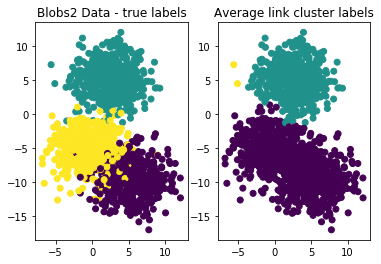

In [82]:
average_linkage = AgglomerativeClustering(linkage="average", n_clusters=n_clusters)
Blobs2_y_agg_average = average_linkage.fit_predict(Blobs2_X)
plt.subplot(1,2,1)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=Blobs2_y)
plt.title('Blobs2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=Blobs2_y_agg_average)
plt.title('Average link cluster labels')
plt.show()

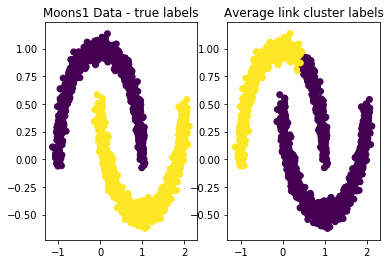

In [83]:
n_clusters = 2
average_linkage = AgglomerativeClustering(linkage="average", n_clusters=n_clusters)
Moons1_y_agg_average = average_linkage.fit_predict(Moons1_X)
plt.subplot(1,2,1)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=Moons1_y)
plt.title('Moons1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=Moons1_y_agg_average)
plt.title('Average link cluster labels')
plt.show()

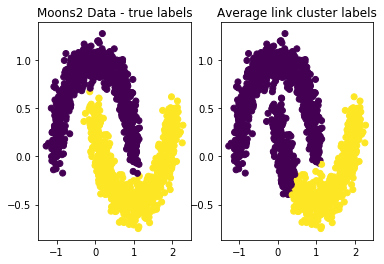

In [84]:
average_linkage = AgglomerativeClustering(linkage="average", n_clusters=n_clusters)
Moons2_y_agg_average = average_linkage.fit_predict(Moons2_X)
plt.subplot(1,2,1)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=Moons2_y)
plt.title('Moons2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=Moons2_y_agg_average)
plt.title('Average link cluster labels')
plt.show()

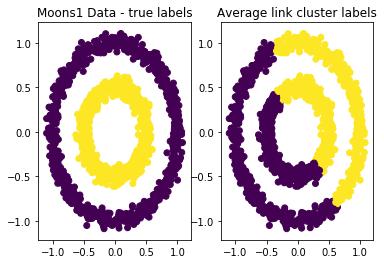

In [85]:
average_linkage = AgglomerativeClustering(linkage="average", n_clusters=n_clusters)
Circles1_y_agg_average = average_linkage.fit_predict(Circles1_X)
plt.subplot(1,2,1)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=Circles1_y)
plt.title('Moons1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=Circles1_y_agg_average)
plt.title('Average link cluster labels')
plt.show()

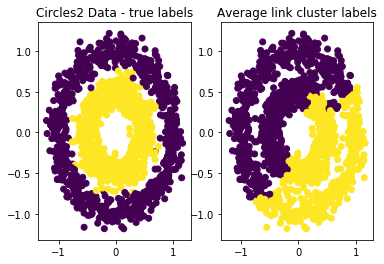

In [86]:
average_linkage = AgglomerativeClustering(linkage="average", n_clusters=n_clusters)
Circles2_y_agg_average = average_linkage.fit_predict(Circles2_X)
plt.subplot(1,2,1)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=Circles2_y)
plt.title('Circles2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=Circles2_y_agg_complete)
plt.title('Average link cluster labels')
plt.show()

<span style="color:green">**Answer: 
 Rank
    <ol>
    <li>Blobs 1 - One or 2 points which lie slightly outside the cluster are wrongly assigned</li>
    <li>Blobs 2 - Considering each cluster size it's  likely to get atleast 3/4th of the points correctly clustered</li>
     <li>Moons1 and Moons 2 - Nearly 3/4th of the points are clustered correctly, again it wrongly clusters the 2nd cluster because one edge is too far from the other edge thus causing it to cluster with wrong cluster</li>
     <li>Circles 1 and Circles 2- Again as mentioned above it merges 2 different clusters into one because within original cluster distance (average) becomes too big at one point, thereby wrongly clustering atleast 50% of the points </li>
 </ol>**
 
   </span>

<span style="color:red">**Question 4d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Average-link agglomerative clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

In [87]:
print(rand_index(Blobs1_y, Blobs1_y_agg_average))
print(rand_index(Blobs2_y, Blobs2_y_agg_average))
print(rand_index(Moons1_y, Moons1_y_agg_average))
print(rand_index(Moons2_y, Moons2_y_agg_average))
print(rand_index(Circles1_y, Circles1_y_agg_average))
print(rand_index(Circles2_y, Circles2_y_agg_average))

0.99911140760507
0.7636575494774294
0.7132310429175005
0.7457647320435846
0.500414498554592
0.5050780520346898


<span style="color:green">**Answer: 
 Rank
    <ol> 
    <li>Blobs 1</li>
     <li>Blobs 2</li> 
     <li>Moons 2</li>
     <li>Moons 1</li>
     <li>Circles 2</li>
     <li>Circles 1</li>
 </ol>**
 
   </span>


<span style="color:red">**Question 4e:** </span> Are the rankings in 4(c) consistent with your observations in 4(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:Yes they're same, but there're slight deviations in the numbers guessed** </span>



### 5. Density Based Clustering: DBSCAN

<span style="color:red">**Question 5a:** </span> Without running DBSCAN clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where DBSCAN clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:Depending on the Eps and Min pts it's likely to do better on Blobs1, Moons1, Moons 2, Circle1 and Circle 2** </span>



<span style="color:red">**Question 5b:** </span> Without running DBSCAN clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where DBSCAN clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer: As the points between 2 out of the 3 clusters are overlapping it's unlikely to find true cluster on this dataset** </span>




<span style="color:red">**Question 5c:** </span> Run DBSCAN clustering algorithm on all the datasets (except Rand). __Choose eps and min_samples parameters to make sure that DBSCAN finds the same number of clusters as in the ground truth ('Data_y').__ Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of DBSCAN clustering algorithm performance. Describe your rationale for your ranking.

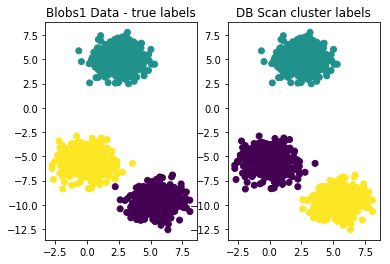

In [100]:
dbscan = DBSCAN(eps=1.5, min_samples=15)
Blobs1_y_dbscan = dbscan.fit_predict(Blobs1_X)
plt.subplot(1,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y)
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y_dbscan)
plt.title('DB Scan cluster labels')
plt.show()

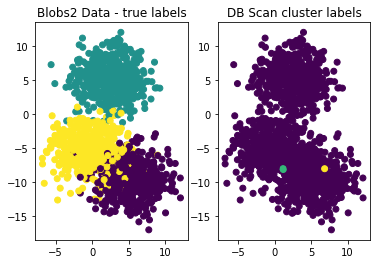

In [207]:
dbscan = DBSCAN(eps=.1, min_samples=4)
Blobs2_y_dbscan = dbscan.fit_predict(Blobs2_X)
plt.subplot(1,2,1)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=Blobs2_y)
plt.title('Blobs2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=Blobs2_y_dbscan)
plt.title('DB Scan cluster labels')
plt.show()

In [208]:
np.unique(Blobs2_y_dbscan)

array([-1,  0,  1,  2], dtype=int64)

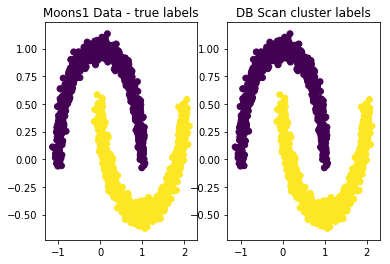

In [174]:
dbscan = DBSCAN(eps=.1, min_samples=2)
Moons1_y_dbscan = dbscan.fit_predict(Moons1_X)
plt.subplot(1,2,1)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=Moons1_y)
plt.title('Moons1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=Moons1_y_dbscan)
plt.title('DB Scan cluster labels')
plt.show()

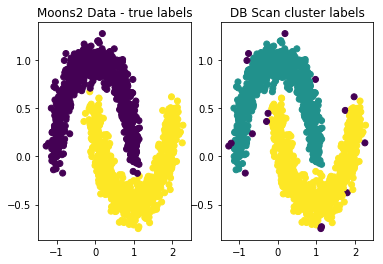

In [136]:
dbscan = DBSCAN(eps=.1, min_samples=3)
Moons2_y_dbscan = dbscan.fit_predict(Moons2_X)
plt.subplot(1,2,1)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=Moons2_y)
plt.title('Moons2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=Moons2_y_dbscan)
plt.title('DB Scan cluster labels')
plt.show()

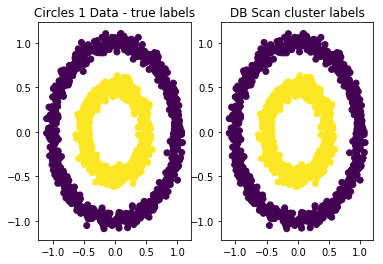

In [143]:
dbscan = DBSCAN(eps=.1, min_samples=10)
Circles1_y_dbscan = dbscan.fit_predict(Circles1_X)
plt.subplot(1,2,1)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=Circles1_y)
plt.title('Circles 1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=Circles1_y_dbscan)
plt.title('DB Scan cluster labels')
plt.show()

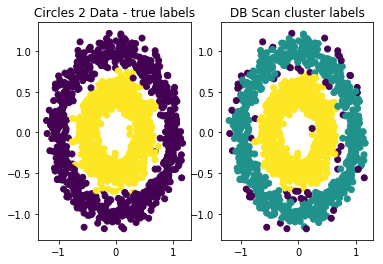

In [167]:
dbscan = DBSCAN(eps=0.1, min_samples=9)
Circles2_y_dbscan = dbscan.fit_predict(Circles2_X)
plt.subplot(1,2,1)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=Circles2_y)
plt.title('Circles 2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=Circles2_y_dbscan)
plt.title('DB Scan cluster labels')
plt.show()

<span style="color:green">**Answer: 
 Rank
    <ol> 
    <li>Blobs 1, Moons 1, Circles 1 - Clustered as expected</li>
     <li>Moons 2 - Overall clustering is very good except very few points beloging to true clusters are categorized as noise</li>
     <li>Circles 2 - Overall clustering is still good although it considers some correct points as noise points</li>
     <li>Blobs 2</li>
 </ol>**
 
   </span>

<span style="color:red">**Question 5d:** </span> For each of the datasets, how many noise points did the DBSCAN algorithm find? Which three datasets had the least number of noise points? Explain the reason(s) why these datasets had least noise points?

In [209]:
print(np.sum(Blobs1_y_dbscan==-1))
print(np.sum(Blobs2_y_dbscan==-1))
print(np.sum(Moons1_y_dbscan==-1))
print(np.sum(Moons2_y_dbscan==-1))
print(np.sum(Circles1_y_dbscan==-1))
print(np.sum(Circles2_y_dbscan==-1))

0
1488
0
16
0
61


<span style="color:green">**Answer: It's because inter-cluster cohesiveness and density for these dataset is very very high** </span>



<span style="color:red">**Question 5e:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using DBSCAN clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

In [212]:
print(np.unique(Blobs2_y_dbscan))
print(np.unique(Moons2_y_dbscan))
print(np.unique(Circles2_y_dbscan))
Blobs2_y_dbscan[Blobs2_y_dbscan < 0] = 3
Moons2_y_dbscan[Moons2_y_dbscan < 0] = 2
Circles2_y_dbscan[Circles2_y_dbscan < 0] = 2

[-1  0  1  2]
[-1  0  1]
[-1  0  1]


In [213]:
print(np.unique(Blobs2_y_dbscan))
print(np.unique(Moons2_y_dbscan))
print(np.unique(Circles2_y_dbscan))

[0 1 2 3]
[0 1 2]
[0 1 2]


In [214]:
print(rand_index(Blobs1_y, Blobs1_y_dbscan))
print(rand_index(Blobs2_y, Blobs2_y_dbscan))
print(rand_index(Moons1_y, Moons1_y_dbscan))
print(rand_index(Moons2_y, Moons2_y_dbscan))
print(rand_index(Circles1_y, Circles1_y_dbscan))
print(rand_index(Circles2_y, Circles2_y_dbscan))

0.99911140760507
0.33823971536579944
1.0
0.9854311763397821
1.0
0.952450967311541


<span style="color:green">**Answer: 
 Rank
    <ol>    
     <li>Moons 1, Circles 1</li>
    <li>Blobs 1</li> 
     <li>Moons 2</li>
     <li>Circles 2</li>
     <li>Blobs 2</li>
 </ol>**
 
   </span>


<span style="color:red">**Question 5f:** </span> Are the rankings in 5(c) consistent with your observations in 5(e)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer: Yes they're consistent, except for some slight deviations in the numbers guestimated** </span>



### 6. Spectral Clustering

<span style="color:red">**Question 6a:** </span> Without running Spectral clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Spectral clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer: spectral clustering will do well on Blobs1, Circles1 and Moons1 because these dataset have good intra-cluster cohesiveness and good inter-cluster separation** </span>



<span style="color:red">**Question 6b:** </span> Without running Spectral clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Spectral clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer: It may not do well on Blobs2, Circles2 and moons2 as the clusters are close to each other and is also not tight** </span>



<span style="color:red">**Question 6c:** </span> Run Spectral clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Spectral clustering algorithm performance. Describe your rationale for your ranking.

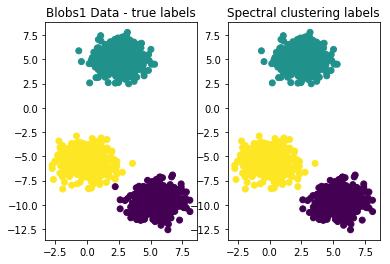

In [215]:
n_clusters = 3
spectral = SpectralClustering(n_clusters=n_clusters, random_state=random_state)
Blobs1_y_spectral = spectral.fit_predict(Blobs1_X)
plt.subplot(1,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y)
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y_spectral)
plt.title('Spectral clustering labels')
plt.show()

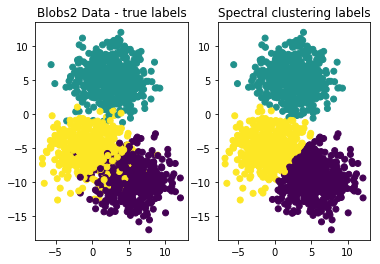

In [216]:
Blobs2_y_spectral = spectral.fit_predict(Blobs2_X)
plt.subplot(1,2,1)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=Blobs2_y)
plt.title('Blobs2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=Blobs2_y_spectral)
plt.title('Spectral clustering labels')
plt.show()

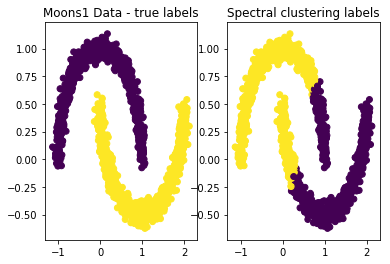

In [219]:
n_clusters = 2
spectral = SpectralClustering(n_clusters=n_clusters, random_state=random_state)
Moons1_y_spectral = spectral.fit_predict(Moons1_X)
plt.subplot(1,2,1)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=Moons1_y)
plt.title('Moons1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=Moons1_y_spectral)
plt.title('Spectral clustering labels')
plt.show()

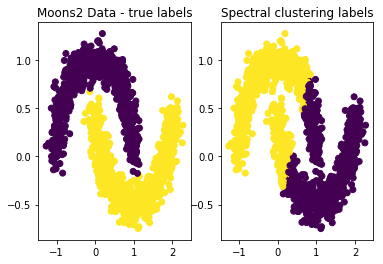

In [220]:
Moons2_y_spectral = spectral.fit_predict(Moons2_X)
plt.subplot(1,2,1)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=Moons2_y)
plt.title('Moons2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=Moons2_y_spectral)
plt.title('Spectral clustering labels')
plt.show()

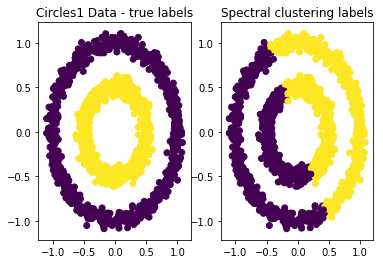

In [221]:
Circles1_y_spectral = spectral.fit_predict(Circles1_X)
plt.subplot(1,2,1)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=Circles1_y)
plt.title('Circles1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=Circles1_y_spectral)
plt.title('Spectral clustering labels')
plt.show()

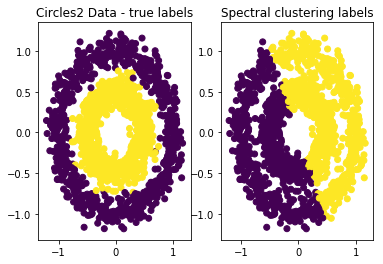

In [222]:
Circles2_y_spectral = spectral.fit_predict(Circles2_X)
plt.subplot(1,2,1)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=Circles2_y)
plt.title('Circles2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=Circles2_y_spectral)
plt.title('Spectral clustering labels')
plt.show()

<span style="color:green">**Answer: 
 Rank
    <ol> 
    <li>Blobs 1 - Clustered almost perfectly</li>
     <li>Blobs 2 - Overall clustering is good although some points have been misclassified</li>
     <li>Moons 1 and Moons 2 -  a little over 50% of the points have been clustered correctly</li>
     <li>Circles 1 and Circles 2 - Nearly 50% of the points are correctly clustered</li>
 </ol>**
 
   </span>

<span style="color:red">**Question 6d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Spectral clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

In [223]:
print(rand_index(Blobs1_y, Blobs1_y_spectral))
print(rand_index(Blobs2_y, Blobs2_y_spectral))
print(rand_index(Moons1_y, Moons1_y_spectral))
print(rand_index(Moons2_y, Moons2_y_spectral))
print(rand_index(Circles1_y, Circles1_y_spectral))
print(rand_index(Circles2_y, Circles2_y_spectral))

0.99911140760507
0.919189682010229
0.6441263064265066
0.6448441183010896
0.49966733377807426
0.4997553924838781


<span style="color:green">**Answer: 
 Rank
    <ol>
    <li>Blobs 1</li>
     <li>Blobs 2</li> 
     <li>Moons 2</li> 
     <li>Moons 1</li>
     <li>Circles 2</li>
     <li>Circles 1</li>
 </ol>**
 
   </span>


<span style="color:red">**Question 6e:** </span> Are the rankings in 6(c) consistent with your observations in 6(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer: Yes they're consistent, except for some slight deviation in the guesstimated numbers** </span>



### 7. Clustering Tendency

<span style="color:red">**Question 7a:** </span> Without using any metrics, for all the datasets (INCLUDING __Rand__) provided in the practice session, list the datasets that exhibit good clustering tendency. Support your answer by explaining your rationale.

<span style="color:green">**Answer: Blobs1, Moons1 and Circles1 exhibit good clustering tendency as the clusters here are well separated and intra-cluster cohesiveness is also very good** </span>



<span style="color:red">**Question 7b:** </span> Without using any metrics, for all the datasets (INCLUDING Rand) provided in the practice session, list the datasets that do NOT exhibit good clustering tendency. Support your answer by explaining your rationale.

<span style="color:green">**Answer: Blobs2, Moons2 and Circles2 don't exhibit as they're not well separated and also the intra-cluster cohesiveness is also not good. And Rand is just some random data points scattered (nearly) uniformly thus unlikely to do well on any sort of clustering** </span>



<span style="color:red">**Question 7c:** </span> Compute Hopkins Statistic statistic for all the datasets and rank them based on decreasing order of this metric.

In [246]:
print(hopkins(Blobs1_X))
print(hopkins(Blobs2_X))
print(hopkins(Moons1_X))
print(hopkins(Moons2_X))
print(hopkins(Circles1_X))
print(hopkins(Circles2_X))
print(hopkins(Rand_X))

0.9350730604883825
0.8499494842209699
0.9280165352998933
0.8792836789466215
0.8450023398351582
0.7650877943087733
0.5940596162748797


<span style="color:green">**Answer: 
 Rank
    <ol>
    <li>Blobs 1</li> 
     <li>Moons 1</li> 
     <li>Moons 2</li>
     <li>Blobs 2</li>
     <li>Circles 1</li>
     <li>Circles 2</li>
        <li>Rand</li>
 </ol>**
 
   </span>

<span style="color:red">**Question 7d:** </span> Are your answers for 7(a) and 7(b) consistent with that of (c)? If not, explain the reason for this inconsistency.

<span style="color:green">**Answer: No it's not consistent it's slightly different, this may be due to how the random sampling was done for calculating Hopkins Statistics** </span>



<span style="color:red">**Question 7e:** </span> Run all the above clustering algorithms (KMeans, GMM, Agglomerative (single, max, average), DBSCAN, Spectral), using n_clusters = 3, on Rand dataset and visualize the clusters. Explain the reason for the shapes of clusters dervied using each clustering approach.

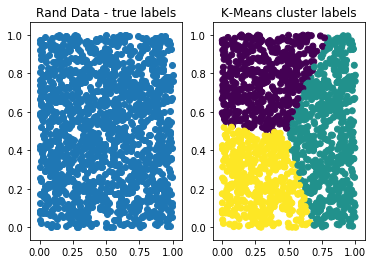

In [231]:
kmeans = KMeans(3, random_state=random_state);
Rand_y_Kmeans = kmeans.fit_predict(Rand_X)
fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1]) # true clusters
plt.title('Rand Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=Rand_y_Kmeans)  # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()

<span style="color:green">**Answer: As we know K-means tries to minimize the sum of squared errors, it's likely the centroids for this shape have the least SSE, hence the shape** </span>

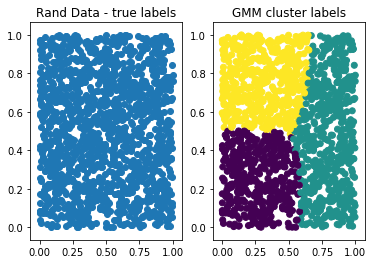

In [230]:
gmm = GaussianMixture(n_components=3, covariance_type='full')
Rand_y_gmm = gmm.fit_predict(Rand_X)
fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1]) # true clusters
plt.title('Rand Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=Rand_y_gmm)  # KMeans clusters
plt.title('GMM cluster labels')
plt.show()

<span style="color:green">**Answer: Although it uses probablility instead of hard split but still it's a centroid based approach much like k-means and the probbality of the points falling in one or the cluster shapes the cluster** </span>

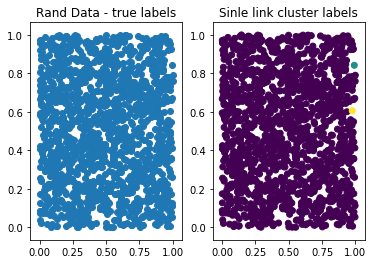

In [234]:
single_linkage = AgglomerativeClustering(linkage="single", n_clusters=3)
Rand_y_agg_single = single_linkage.fit_predict(Rand_X)
fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1]) # true clusters
plt.title('Rand Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=Rand_y_agg_single)  # KMeans clusters
plt.title('Sinle link cluster labels')
plt.show()

<span style="color:green">**Answer: since most points are very close with one another and single link uses the distance between two nearest points of the cluster, the algorithm has formed one big cluster leaving out two farthest points** </span>

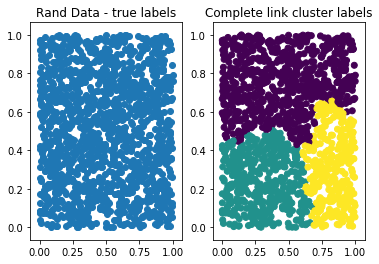

In [235]:
complete_linkage = AgglomerativeClustering(linkage="complete", n_clusters=3)
Rand_y_agg_complete = complete_linkage.fit_predict(Rand_X)
fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1]) # true clusters
plt.title('Rand Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=Rand_y_agg_complete)  # KMeans clusters
plt.title('Complete link cluster labels')
plt.show()

 <span style="color:green">**Answer: Again the shape here may be due to the fact that Complete link uses the farthest point to calculate the distance, so it's likely that points got clustered assigned to the cluster where it had least complete-link distance even though the points in actuality were closer to points from other clusters** </span>

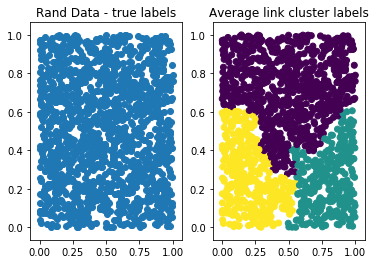

In [236]:
average_linkage = AgglomerativeClustering(linkage="average", n_clusters=3)
Rand_y_agg_average = average_linkage.fit_predict(Rand_X)
fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1]) # true clusters
plt.title('Rand Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=Rand_y_agg_average)  # KMeans clusters
plt.title('Average link cluster labels')
plt.show()

<span style="color:green">**Answer: Here the shape is caused by the calculating the distance as the distance between the average of the two clusters and then merging the two small clusters which has least distance** </span>

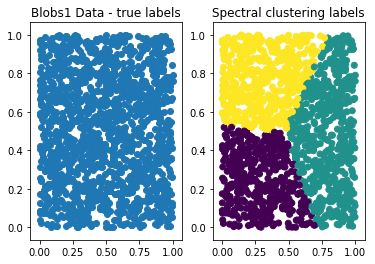

In [248]:
n_clusters = 3
spectral = SpectralClustering(n_clusters=n_clusters, random_state=random_state)
Rand_y_spectral = spectral.fit_predict(Rand_X)
plt.subplot(1,2,1)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1])
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=Rand_y_spectral)
plt.title('Spectral clustering labels')
plt.show()

<span style="color:green">**Answer: Spectral clustering uses affinity and degree matrix to do clustering, from the above shape it looks likely that clustering was done using the Average weight cut method where the focus is to increase the intra-cluster cohesiveness. This can be understood by comparing it with K Means which strives for the least SSE (i.e as close as possible to any of the centroids)** </span>

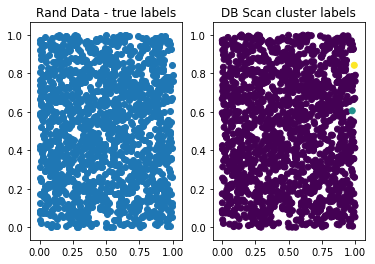

[0 1 2]


In [267]:
dbscan = DBSCAN(eps=.0402, min_samples=1)
Rand_y_dbscan = dbscan.fit_predict(Rand_X)
plt.subplot(1,2,1)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1])
plt.title('Rand Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=Rand_y_dbscan)
plt.title('DB Scan cluster labels')
plt.show()
print(np.unique(Rand_y_dbscan))

<span style="color:green">**Answer: Again much like single-link, DB scan finds one big very cluster because the points are very dense and it also finds 2 other points which're little away from the cluster as we force DB Scan to find 3 clusters in total** </span>



### 8. Real-world dataset

We will use the same breast cancer dataset we used for Classificatione exercise here.

In [237]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

The features are:

In [238]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Class labels are:

In [239]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

Create dataset for classification

In [240]:
Cancer_X = cancer.data
Cancer_y = cancer.target

Size of Cancer_X and Cancer_y

In [241]:
Cancer_X.shape

(569, 30)

In [242]:
Cancer_y.shape

(569,)

<span style="color:red">**Question 8a:** </span> Compute SSE for k = range(2,40), i.e, for k=2,3,4,...,40

In [243]:
random_state = 10;
score = np.zeros(40);
for i in range(2,40):
 kmeans = KMeans(n_clusters=i, random_state=random_state); #Initializing KMeans
 kmeans.fit_predict(Cancer_X) #Clustering using KMeans
 score[i] = -kmeans.score(Cancer_X) #Computing SSE
 print("SSE for k=",i,":", round(score[i],2)) #Printing SSE

SSE for k= 2 : 77943099.88
SSE for k= 3 : 47285926.9
SSE for k= 4 : 29226541.65
SSE for k= 5 : 20539877.62
SSE for k= 6 : 16558716.7
SSE for k= 7 : 13249736.07
SSE for k= 8 : 11183535.78
SSE for k= 9 : 9609383.58
SSE for k= 10 : 8487166.05
SSE for k= 11 : 7613587.21
SSE for k= 12 : 6784588.86
SSE for k= 13 : 6157087.42
SSE for k= 14 : 5708365.13
SSE for k= 15 : 5286031.4
SSE for k= 16 : 4848940.46
SSE for k= 17 : 4398276.58
SSE for k= 18 : 4009831.04
SSE for k= 19 : 3738118.1
SSE for k= 20 : 3578729.29
SSE for k= 21 : 3312041.59
SSE for k= 22 : 3102392.22
SSE for k= 23 : 2894387.69
SSE for k= 24 : 2768624.68
SSE for k= 25 : 2685795.48
SSE for k= 26 : 2514580.5
SSE for k= 27 : 2362959.95
SSE for k= 28 : 2257591.62
SSE for k= 29 : 2148955.49
SSE for k= 30 : 2036764.0
SSE for k= 31 : 1969448.35
SSE for k= 32 : 1833170.63
SSE for k= 33 : 1791369.0
SSE for k= 34 : 1722589.76
SSE for k= 35 : 1677340.13
SSE for k= 36 : 1656114.54
SSE for k= 37 : 1528956.63
SSE for k= 38 : 1496563.45
SSE for k

<span style="color:red">**Question 8b:** </span> Plot SSE values for k = range(2,40), i.e, for k=2,3,4,...,40

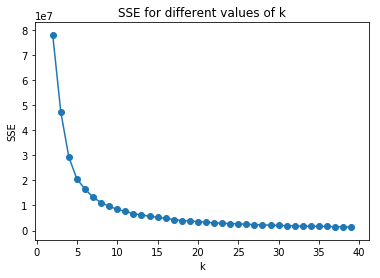

In [244]:
plt.plot(range(2,40),score[2:40])
plt.scatter(range(2,40),score[2:40])
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('SSE for different values of k')
plt.show()

<span style="color:red">**Question 8c:** </span> Using this plot, determine the 'k' that you will use to do K-Means clustering.

<span style="color:green">**Answer: We will use k = 5 as we can see a big drop in SSE till that point, after that sse only slowly decreases** </span>



<span style="color:red">**Question 8d:** </span> Using the 'k' you chose in (c), compute k-Means clustering.

In [277]:
kmeans = KMeans(n_clusters=5, random_state=random_state);
Cancer_y_Kmeans = kmeans.fit_predict(Cancer_X)

<span style="color:red">**Question 8e:** </span> Plot the silhouette values for points in each cluster (using the silhouette() function provided in the practice notebook). .

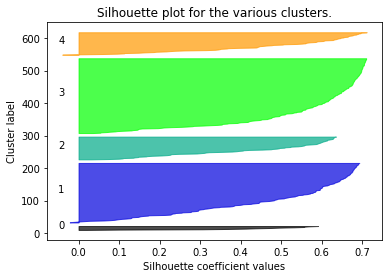

In [278]:
silhouette(Cancer_X,Cancer_y_Kmeans)

<span style="color:red">**Question 8f:** </span> Comment on the quality of the clusters discovered using k-Means. Which of the clusters would you treat as good clusters and which clusters do you treat as not-so-good clusters?

<span style="color:green">**Answer: Clusters 1, 3 and 4  seems to be more cohesive than other clusters, hence we would take these as good clusters and clusters 0 and 2 doesn't seem to be cohesive, hence we would treat them as not-so-good clusters** </span>



<span style="color:red">**Question 8g:** </span> Compute the Rand Index of the k-means clusters with respect to the true labels. Comment on the quality of the clustering based on the Rand-Index score.

In [282]:
print(rand_index(Cancer_y, Cancer_y_Kmeans))

0.6625473402807001


<span style="color:green">**Answer: The quality of clustering seems to be very average** </span>



<span style="color:red">**Question 8h:** </span> To use DBSCAN to find clusters in this data, one needs to determine eps and min_samples. To do this, consider the range of values eps = 50, 100, 150, 200, 250, 300, 400, 500 and min_samples = 10, 15, 20, 25, 30. 

For these range of eps and min_samples values, compute an 8x5 matrix (with rows as eps values and cols as min_samples) to show the number of clusters obtained at each of these parameters. Visualize this matrix using imshow() in matplotlib.

Hint: To compute the number of clusters, you may use:

y_pred = dbscan.fit_predict(Cancer_X)

max(y_pred)+1

In [324]:
e50_m10 = DBSCAN(eps=50, min_samples=10).fit_predict(Cancer_X)
e50_m15 = DBSCAN(eps=50, min_samples=15).fit_predict(Cancer_X)
e50_m20 = DBSCAN(eps=50, min_samples=20).fit_predict(Cancer_X)
e50_m25 = DBSCAN(eps=50, min_samples=25).fit_predict(Cancer_X)
e50_m30 = DBSCAN(eps=50, min_samples=30).fit_predict(Cancer_X)

e100_m10 = DBSCAN(eps=100, min_samples=10).fit_predict(Cancer_X)
e100_m15 = DBSCAN(eps=100, min_samples=15).fit_predict(Cancer_X)
e100_m20 = DBSCAN(eps=100, min_samples=20).fit_predict(Cancer_X)
e100_m25 = DBSCAN(eps=100, min_samples=25).fit_predict(Cancer_X)
e100_m30 = DBSCAN(eps=100, min_samples=30).fit_predict(Cancer_X)

e150_m10 = DBSCAN(eps=150, min_samples=10).fit_predict(Cancer_X)
e150_m15 = DBSCAN(eps=150, min_samples=15).fit_predict(Cancer_X)
e150_m20 = DBSCAN(eps=150, min_samples=20).fit_predict(Cancer_X)
e150_m25 = DBSCAN(eps=150, min_samples=25).fit_predict(Cancer_X)
e150_m30 = DBSCAN(eps=150, min_samples=30).fit_predict(Cancer_X)

e200_m10 = DBSCAN(eps=200, min_samples=10).fit_predict(Cancer_X)
e200_m15 = DBSCAN(eps=200, min_samples=15).fit_predict(Cancer_X)
e200_m20 = DBSCAN(eps=200, min_samples=20).fit_predict(Cancer_X)
e200_m25 = DBSCAN(eps=200, min_samples=25).fit_predict(Cancer_X)
e200_m30 = DBSCAN(eps=200, min_samples=30).fit_predict(Cancer_X)

e250_m10 = DBSCAN(eps=250, min_samples=10).fit_predict(Cancer_X)
e250_m15 = DBSCAN(eps=250, min_samples=15).fit_predict(Cancer_X)
e250_m20 = DBSCAN(eps=250, min_samples=20).fit_predict(Cancer_X)
e250_m25 = DBSCAN(eps=250, min_samples=25).fit_predict(Cancer_X)
e250_m30 = DBSCAN(eps=250, min_samples=30).fit_predict(Cancer_X)

e300_m10 = DBSCAN(eps=300, min_samples=10).fit_predict(Cancer_X)
e300_m15 = DBSCAN(eps=300, min_samples=15).fit_predict(Cancer_X)
e300_m20 = DBSCAN(eps=300, min_samples=20).fit_predict(Cancer_X)
e300_m25 = DBSCAN(eps=300, min_samples=25).fit_predict(Cancer_X)
e300_m30 = DBSCAN(eps=300, min_samples=30).fit_predict(Cancer_X)

e350_m10 = DBSCAN(eps=350, min_samples=10).fit_predict(Cancer_X)
e350_m15 = DBSCAN(eps=350, min_samples=15).fit_predict(Cancer_X)
e350_m20 = DBSCAN(eps=350, min_samples=20).fit_predict(Cancer_X)
e350_m25 = DBSCAN(eps=350, min_samples=25).fit_predict(Cancer_X)
e350_m30 = DBSCAN(eps=350, min_samples=30).fit_predict(Cancer_X)

e400_m10 = DBSCAN(eps=400, min_samples=10).fit_predict(Cancer_X)
e400_m15 = DBSCAN(eps=400, min_samples=15).fit_predict(Cancer_X)
e400_m20 = DBSCAN(eps=400, min_samples=20).fit_predict(Cancer_X)
e400_m25 = DBSCAN(eps=400, min_samples=25).fit_predict(Cancer_X)
e400_m30 = DBSCAN(eps=400, min_samples=30).fit_predict(Cancer_X)

In [328]:
dbscan_matrix = np.matrix([[max(e50_m10)+1,max(e50_m15)+1,max(e50_m20)+1,max(e50_m25)+1,max(e50_m30)+1],
                           [max(e100_m10)+1,max(e100_m15)+1,max(e100_m20)+1,max(e100_m25)+1,max(e100_m30)+1],
                           [max(e150_m10)+1,max(e150_m15)+1,max(e150_m20)+1,max(e150_m25)+1,max(e150_m30)+1],
                           [max(e200_m10)+1,max(e200_m15)+1,max(e200_m20)+1,max(e200_m25)+1,max(e200_m30)+1],
                           [max(e250_m10)+1,max(e250_m15)+1,max(e250_m20)+1,max(e250_m25)+1,max(e250_m30)+1],
                           [max(e300_m10)+1,max(e300_m15)+1,max(e300_m20)+1,max(e300_m25)+1,max(e300_m30)+1],
                           [max(e350_m10)+1,max(e350_m15)+1,max(e350_m20)+1,max(e350_m25)+1,max(e350_m30)+1],
                           [max(e400_m10)+1,max(e400_m15)+1,max(e400_m20)+1,max(e400_m25)+1,max(e400_m30)+1]])
print(dbscan_matrix)

[[1 1 1 2 1]
 [2 2 1 1 1]
 [1 1 1 2 2]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


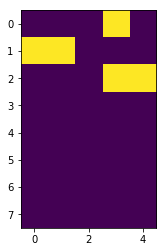

In [329]:
plt.imshow(dbscan_matrix)

<span style="color:red">**Question 8i:** </span> For these range of eps and min_samples values, compute an 8x5 matrix (with rows as eps values and cols as min_samples) to show the number of noise points obtained at each of these parameters. Visualize this matrix using imshow() in matplotlib.

Hint: To compute the number of noise points, you may use:

y_pred = dbscan.fit_predict(Cancer_X)

sum(y_pred==-1)

In [330]:
noise_matrix = np.matrix([
    [sum(e50_m10 == -1),sum(e50_m15 == -1),sum(e50_m20 == -1),sum(e50_m25 == -1),sum(e50_m30 == -1)],
    [sum(e100_m10 == -1),sum(e100_m15 == -1),sum(e100_m20 == -1),sum(e100_m25 == -1),sum(e100_m30 == -1)],
    [sum(e150_m10 == -1),sum(e150_m15 == -1),sum(e150_m20 == -1),sum(e150_m25 == -1),sum(e150_m30 == -1)],
    [sum(e200_m10 == -1),sum(e200_m15 == -1),sum(e200_m20 == -1),sum(e200_m25 == -1),sum(e200_m30 == -1)],
    [sum(e250_m10 == -1),sum(e250_m15 == -1),sum(e250_m20 == -1),sum(e250_m25 == -1),sum(e250_m30 == -1)],
    [sum(e300_m10 == -1),sum(e300_m15 == -1),sum(e300_m20 == -1),sum(e300_m25 == -1),sum(e300_m30 == -1)],
    [sum(e350_m10 == -1),sum(e350_m15 == -1),sum(e350_m20 == -1),sum(e350_m25 == -1),sum(e350_m30 == -1)],
    [sum(e400_m10 == -1),sum(e400_m15 == -1),sum(e400_m20 == -1),sum(e400_m25 == -1),sum(e400_m30 == -1)]
])

print(noise_matrix)

[[187 195 206 220 262]
 [ 56 100 143 148 158]
 [ 27  34  41  62  96]
 [ 20  21  25  31  31]
 [ 18  20  20  22  22]
 [ 12  15  19  20  21]
 [ 11  12  13  13  17]
 [ 11  11  11  13  13]]


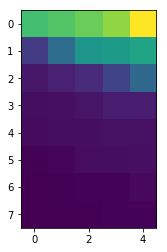

In [333]:
plt.imshow(noise_matrix)

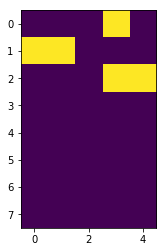

In [334]:
plt.imshow(dbscan_matrix)

<span style="color:red">**Question 8j:** </span> What observations can you make about the clustering structure in this data, based on the matrices you generated for 8(g) and 8(h)?

<span style="color:green">**Answer:
  <ul>
      <li>Eps 50: Here the points are not dense enough to find clean clusters with minimum noise points, hence more often we find only cluster with large number of noise points meaning either neighbourhood distance was too small or the minimum number of nieghbour required was too big to form a cluster. However in one case we manage to find 2 clusters (but with more noise) when the min neighbour required is at 25, it could be because DB Scan broke up one cluster in to two based on the criteria, meanwhile also rendering a large number of points as noise. Further again at min pts 30, DB scan finds only one cluster but the number of noise points increased, suggesting that there was only one set of points that're dense enough (i.e 30 at Eps 50) to be considered a cluster. This may be due to fact that some of the points which belonged to cluster 2 at min pts 25 became neighbours of cluster 1, thus decreasing the neighbourhood/density of the other cluster rendering those points to be noise points
      </li>
      <li> Eps 100: At distance 100 we find 2 clusters for both min pts 10, 15 but as soon as we increase the min pts we find only one cluster and the number of noise points also goes up, this may be due to the fact that the points aren't super dense
      </li>
      <li>Eps 150: Here at min pts 25 and 30 we find 2 clusters but the number of noise points also signifcantly goes up from min pts 10, 15 and 20. Suggesting that an increase in the threshold has limited the stretch of the 1 big cluster found at 10, 15 and 20.
      </li>
      <li>
          Eps 200, 250, 300, 350: As the neighbourhood radius increases it seems majority of points fall within 1 big cluster.
          More noise points are naturally added into  the 1 big cluster either with decrease in min pts required or with increase in the neighbourhood distance.
      </li>
          
  </ul>DB Scan Eps 100 and min pts 10 seems to give us the best result considering we require 2 clusters for the dataset.
  ** </span>



<span style="color:red">**Question 8k:** </span> Select the parameters for eps, min_samples based on your answers for 8(g), 8(h) and 8(i). Compute cluster assigments using DBSCAN. Compute RandIndex of the cluster assignments with respect to the true labels.

In [382]:
final_param = DBSCAN(eps=100, min_samples=10).fit_predict(Cancer_X)

In [383]:
np.unique(final_param)

array([-1,  0,  1], dtype=int64)

In [384]:
print(sum(final_param == -1))

56


In [385]:
final_param[final_param < 0] = 2

In [386]:
print(rand_index(Cancer_y, final_param))

0.6680115844451595


<span style="color:red">**Question 8l:** </span> Compare RandIndex from 8(g) with that of 8(k) and determine which algorithm performed best? Based on this, comment on how the data/clusters may be distributed in $R^d$.

In [387]:
print(rand_index(Cancer_y, Cancer_y_Kmeans))
print(rand_index(Cancer_y, final_param))

0.6625473402807001
0.6680115844451595


In [425]:
kmeans2 = KMeans(n_clusters=2, random_state=random_state);
Cancer_y_Kmeans = kmeans2.fit_predict(Cancer_X)
print(rand_index(Cancer_y, Cancer_y_Kmeans))

0.7503774845912028


<span style="color:green">**Answer: DB Scan performs only marginally better than K- means. It seems like there is one small dense cluster which increases with increase in neighbourhood  but becomes less cohesive as it increases, with other small clusters scattered around. Kmeans shows a knee or a big drop at SSE suugesting that apart from one dense cluster there're four other small clusters, which ofcourse isn't big or dense enough to be a cluster (as found by DB Scan). All in all we can say from our analysis that there is one dense cluster of points with atleast 4 other small but not dense clusters, which again when the neighbourhood distance is increased may itself form into a cluster. Hpwever when change the cluster size to 2 and run K means for cancer data, the accuracy improves, suggesting a 1 big good cluster and another loosely coupled cluster (i.e likely that aforementioned 4 smalls clusters, parts of hich looselly combine to form another cluster).  ** </span>

